# Week 4 - Introduction and Business Problem

# Introduction

The human relationship with "Man's best friend" goes back more than fifteen thousand years(1).  Archaeological discoveries from Greek and Roman Epitaphs suggest that even two thousand years ago, dogs were more than useful working animals, but a cherished part of the family(2). In Canada, there are almost 8 million dogs country-wide, and 35% of households have a dog(3,4). During COVID-19, Canada experienced a surge in pet ownership - 18% of pet owners reported obtaining a new pet since the start of the pandemic, with owners in the 18-24 age bracket most likely (38%) to have purchased a pet since then(4). COVID-19 has also been responsible for a majority of working Canadians to work from home, with this increased closeness causing the human-dog bond to be even stronger. As COVID-19 restrictions ease, there will be a need for 'outside' activities that do not jeopardize these bonds.

Vancouver, located in British Columbia, Canada, is home to a growing number of craft breweries with more than 20 new breweries being added in the province each year since 2013, with 27 breweries in Vancouver alone as of 2020(5). This plethora of breweries supports an even larger number of pubs. Foursquare.com, a website that provides detailed information on more than 75 million venues worldwide, lists over 90 pubs within the city limits with many more in the surrounding suburbs. 

Off-leash beer gardens - dog bars - are a relatively new phenomenon, with a few in the United States (examples: [Paws For a Beer](https://www.pawsforabeer.com/?fbclid=IwAR1vR_nEbPuP_X_vJ_406pj7Hv4Frbwvf4XkB0jvN57R0N0PVcxLhbtSIMo) (Bellingham, WA),  [Dog Bar St Pete](https://dogbarstpete.com/?fbclid=IwAR38NEeC8Zo49SXMmkkuhTP2CGJ0O72jJ_tAnsDC-MDUJAPf6Bekntcw9oU) (St. Petersberg, FL) and [Taps and Tails Dog Bar](https://www.tapsandtailsdogbar.com/)) (Cleveland, OH) and although there are a few dog-friendly pubs, there are no bona-fide dog bars in Vancouver. A dog bar is like an off-leash dog park with the addition of a full service bar so that owner and their dog can enjoy quality time socializing, meeting and getting to know new people (and dogs) and have a truly enjoyable outing together.  Opening a new dog bar will require detailed and well-thought out plan and involves many variables, not least of which is where in the city it would best be located.  In this project we will use demographic data combined with data from Foursquare.com to investigate the best neighborhood in which to create a dog bar in Vancouver.  



## Problem Statement

The problem this project aims to solve is to analyze which neighborhoods in the City of Vancouver would be the best location in which to create a dog bar.  Using Machine-learning techniques such as Clustering analysis, some of the factors it will take into consideration will be: 
<ul>
    <li> which neighborhoods have existing dog parks?</li>
    <li> which neighborhoods have existing pubs?</li>
    <li> how dog-friendly are existing pubs?</li>
    <li> what is the density of dog-owning households in each neighborhood</li>
</ul>
      

## Target Audience

The key audience for this project will be entrepreneurs looking to open a novel business in an optimum location in Vancouver; armed with the insights gained in this project about where to locate it, they will be able to plan the next phase of their business plan to open Vancouver's first dog bar.  In addition, dog owners would benefit from knowing where their nearest dog parks would be, and, barring the introduction of an actual dog bar, if there is a pub on the way to or from the dog park that is dog-friendly.  Patrons of existing pubs would be interested in the outcome, particularly those with dogs.  Owners and potential owners of pubs as well as city planners would also benefit from insights into the locations of other pubs and the degree to which they are dog-friendly provided by this project.

# Data

The sources of data for this project will be as follows.  Example data sets are presented in the Strategy section below:
1. Wikipedia.com 
<ul>
<li>Description: list and descriptions of the 22 neighborhoods of the City of Vancouver, BC, Canada.</li>
<li>Source: https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Vancouver</li>
<li>Purpose: to identify the names and descriptions of the neighborhoods in Vancouver and, using the beautiful soup library, scrape the table from HTML into a Pandas Dataframe.</li>
</ul>
<br/>

2. City of Vancouver Open Data Portal
<ul>
<li>Description: listing of Vancouver's 22 neighborhoods including their names, bounding polygons and centroids</li>
<li>Source: https://opendata.vancouver.ca/explore/dataset/local-area-boundary/table/</li>
<li>Purpose: to identify the central point of each neighborhood in Vancouver, BC</li>
</ul>
<br/>
   

3. People, Parks and Dogs Strategy Appendix
<ul>
<li>Description: PDF document containing a table containing Statistics Canada 2016 census data on dog-owning households in Vancouver Neighborhoods.</li>
<li>Source: https://vancouver.ca/files/cov/people-parks-dogs-strategy-appendix.pdf <br/>
    Note: since this is a pdf document and we did not cover this in the course, this required researching and using a different library to perform this type of scraping.  For this we used the tabula-py library. </li>
<li>Purpose: to identify neighbourhoods with higher density of dog-owning households </li>
</ul>
<br/>
4. Foursquare API
<ul>
<li>Description: A web-based service that provides suggestions of places to visit (venues) near a user's location as well as tips and ratings from other users of those venues.  Foursquare also provides an API that can be used by developers to query the Foursquare data.</li>
<li>Source: https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    RADIUS, 
    LIMIT) where CLIENT_ID, CLIENT_SECRET, VERSION and LIMIT are static, developer and version-specific parameters, and the parameters latitude, longitude and radius cause the API to return venues within RADIUS meters of the geopoint at cooridnates specified by latitude and longitude.  The key data for this project will be the retuned venues for the center point of each neighborhood with categories 1) dog park/off-leash area and 2) pub, beer parlour, brew-pub or bar.  We will also investigate the user ratings of each.</li>
<li>Purpose:to use the Foursquare API to identify, visualize and rank the distribution of pubs and existing dog parks across Vancouver neighborhoods.</li>
</ul>
<br/>



### Strategy
#### 1. WIkipedia Table
First we will obtain a listing of the neighborhoods in Vancouver by scraping the wikipedia page listed in the first data source, massaging the data and storing it in a DataFrame.<br/>Below is a sample of the data.  <br/>
</li>
    </ul>
**Note that the full data and code to collect it are in the DataCollection.ipynb notebook, and will be included in the final report

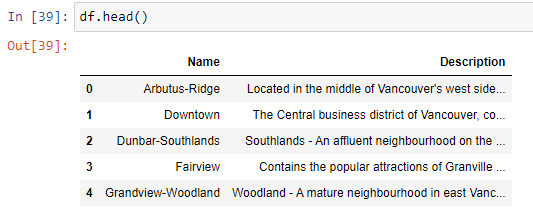

 #### 2. Get the geo-Coordinates of each neighborhood from the Vancouver Open Data Portal.
 Second, we will use Pandas to read and merge the Wikipedia Data Frame with the City of Vancouver Open Data Portal's JSON listing of the centroid of each neighborhood, again, wrangling the data so that only relevant columns are retained.<br/>
    Here is an example of the data:
 

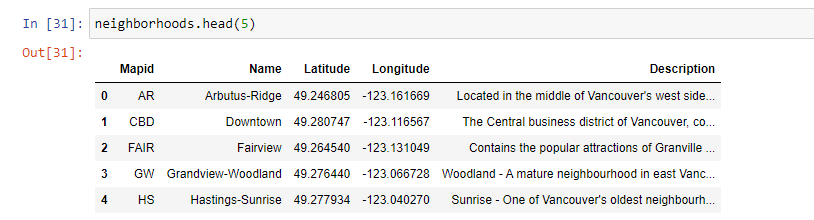

#### 3. Get the population of dogs in each neighborhood from the Dogs, Parks and People Strategy Appendix published by Vancouver Parks Board
In order to attact dog owners, the new dog bar will ideally be located in a neighborhood in which a maxiumum number of households have dogs. We will use web scraping to extract data on dog licensing by neighborhood from the People, Parks and Dogs Strategy publihed by the Vancouver Parks board. We will superimpose this data on a Folium map of Vancouver's neighborhoods to visualize neighborhoods with higher numbers of licensed dogs. We assume that while dog licensing is less than 100%, the degree of compliance is the same across neighborhoods, so the proportion of actual dogs will be somewhat higher by about the same amount in each neighborhood.<br/>
    Here is an example of the dog licensing by neighborhood: 
 

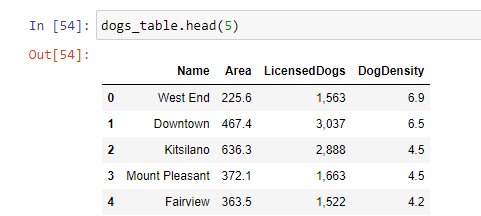

#### 4. Use the FourSquare API to identify dog parks in the vicinity of each neighborhood.
The new dog bar should be in a location with few or no existing dog parks, improving the chances that dog owners will patronize the new location. We will use the Foursquare API to identify dog parks in close proximity to the neighborhood centroids.  Again, we will visualize these on a Folium map. <br/> Here is an example for dog parks and dog runs in the first neighborhood (Arbutus-Ridge):


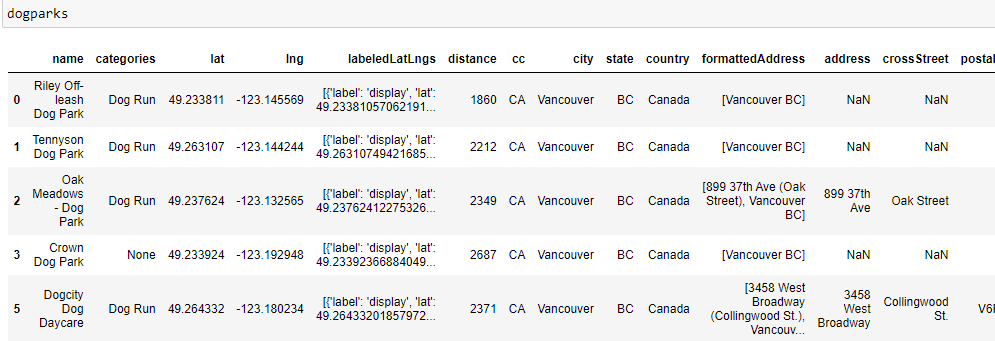

#### 5.  Use the FourSquare API to identify pubs in the vicinity of each neighborhood.
Finally, the new dog bar would ideally be located in neighborhoods with existing pubs - this strategy takes advantage of the fact that existing pub owners have already determined that the demographics, availability of transportation, parking and other attributes are likely to attract pub-going patrons and have used advertising and promotion to attract customers. With the addition of a dog bar, dog-owning pub customers in these neighborhoods would now have a new attractive choice of venue.  To determine the best location, this project will use the Foursquare API data, apply clustering analysis (such as K-Means clustering) and/or correlation to find and visualize neighborhoods with high numbers of existing pubs, particularly those with high dog-friendliness scores in the FourSquare data and that also correspond to neighborhoods with few or no dog parks but with high levels of dog ownership. 
    <br/>
    Here is an example of the data for pubs in the vicinity of the same neighborhood as the dog park data (Arbutus-Ridge):
    

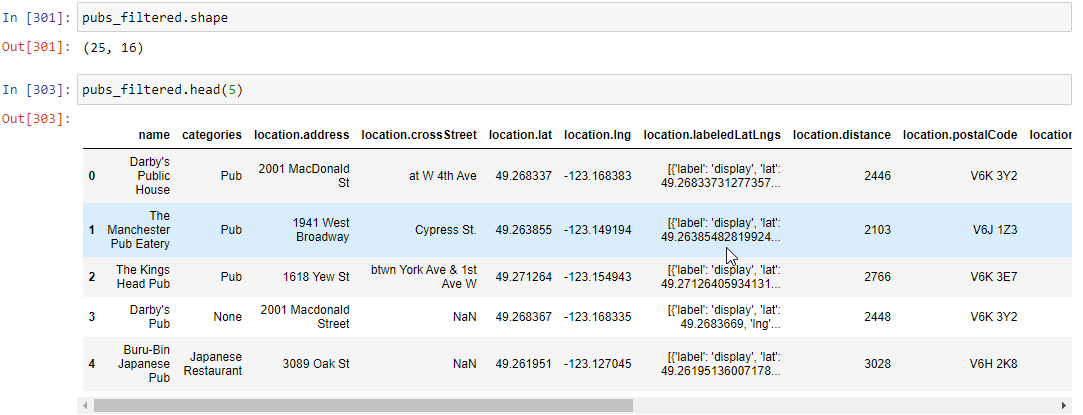

### References:

<ol>
<li>
Serpell, J. (1995). The Domestic Dog: Its Evolution, Behaviour and Interactions with People. Retrieved from https://books.google.com.au/books?id=I8HU_3ycrrEC&lpg=PA7&dq=Origins%20of%20the%20dog%3A%20domestication%20and%20early%20history%20%2F%E2%80%8B%20Juliet%20Clutton-Brock&pg=PA7#v=onepage&q&f=false
    </li>
    <li>
Podberscek,Anthony L.,  Paul, Elizabeth S. and Serpell, James A.(2005) Companion Animals and Us: Exploring the Relationship Between People and Pets. Cabridge University Press      
    </li>
    <li>
Bush (2011). Canada's Pet Wellness Report. Retrieved from:  https://www.canadianveterinarians.net/documents/canada-s-pet-wellness-report2011#:~:text=The%20subject%20of%20pet%20wellness,(source%3A%20Ipsos%20Reid).
    </li>
    <li>
Chapman, M and Pisani, S. (2020) https://narrativeResearch.ca/canada-has-seen-a-significant-increase-in-pet-owners-since-the-start-of-the-covid-19-pandemic/
    </li>
    <li>
        Siren, C (2021) https://www.cahi-icsa.ca/news/2020-canadian-pet-population-figures-released
    </li>
    <li>
      Wiebe, J, 2020. Looking Back on the Biggest Decade in BC Craft Beer History  https://bcaletrail.ca/looking-back-on-the-biggest-decade-in-bc-craft-beer-history/
    </li>
</ol>